NAMA    : RIKO FAJARUDIN

KODE    : PYTN-KS10-023


ASSIGNMENT 3

Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


In [70]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix
import random
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [71]:
# Membaca file dataset
df_bank = pd.read_csv('bank.csv', skipinitialspace=True,  sep=';')

#Melihat 10 record pertama
df_bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [72]:
#Menampilkan semua nama kolom
df_bank.columns 


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [73]:
# melihat list dari column headers
df_bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [74]:
#melihat informasi dari dataFrame
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [75]:
# melihat list index
df_bank.index.values

array([   0,    1,    2, ..., 4518, 4519, 4520], dtype=int64)

In [76]:
# Melihat dimensi dataFrame
df_bank.shape

(4521, 17)

In [77]:
#melihat deskripsi data
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [78]:
# Mengganti 'unknown' dengan Numpy nan
df_bank[df_bank[df_bank.columns]=='unknown']=np.nan 

In [79]:
# Cek apakah 'unknown' sudah terganti dengan nan
df_bank[df_bank[df_bank.columns]=='unknown'].count().sort_values(ascending=False) 

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [80]:
# Melihat jumlah np.nan
print("Bank Data:")
print(df_bank.isnull().sum().sort_values(ascending=False), "\n")

Bank Data:
poutcome     3705
contact      1324
education     187
job            38
month           0
previous        0
pdays           0
campaign        0
duration        0
age             0
day             0
loan            0
housing         0
balance         0
default         0
marital         0
y               0
dtype: int64 



In [81]:
#Mengganti np.nan pada kolom kategorikal dengan modusnya
df_bank.job.fillna(df_bank.job.mode()[0],inplace=True)
df_bank.education.fillna(df_bank.education.mode()[0],inplace=True)
df_bank.contact.fillna(df_bank.contact.mode()[0],inplace=True) 
df_bank.poutcome.fillna(df_bank.poutcome.mode()[0],inplace=True)  
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [82]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,failure,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,failure,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,failure,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,cellular,9,may,153,1,-1,0,failure,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,failure,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [83]:
#Mengganti nama kolom 'y' menjadi 'subscribed'
df_bank.rename(columns={'y':'subscribed'}, inplace=True)

In [103]:
# Encoding data kategorikal
df_bank_t = df_bank.copy()
le = preprocessing.LabelEncoder()

def transformasi(col):
    a = le.fit_transform(df_bank[col])
    pd.DataFrame(a)
    df_bank_t[col] = a
    
categorical =   ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed']  

for i in categorical:
    transformasi(i)
    
df_bank_t 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,0,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,0,2,6,195,3,0,0,0,0
4,40,1,1,1,0,274,1,0,0,4,8,222,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,119,1,0,0,29,5,325,4,0,0,0,0
4517,38,6,1,2,1,0,1,1,0,8,8,149,0,0,0,0,0
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,0,0
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,1,0


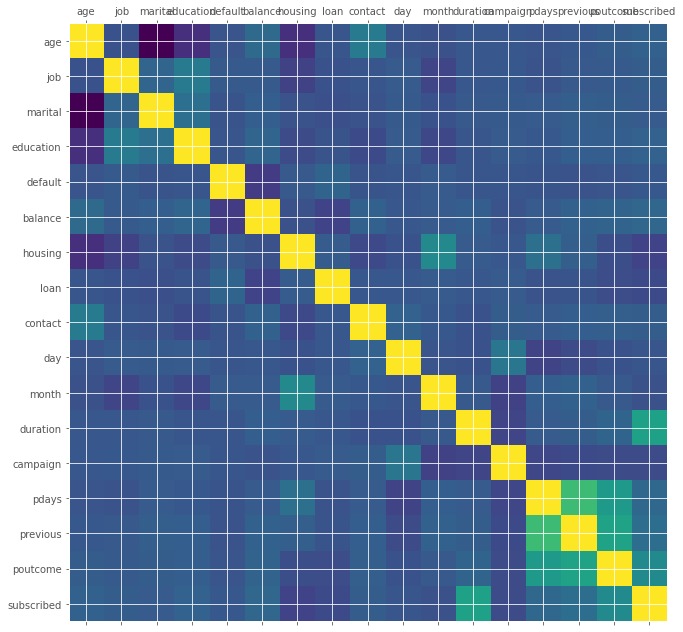

In [85]:
# Melihat korelasi antar feature
def plot_corr(df_bank_t, size=11):
    corr = df_bank_t.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)


# cek korelasinya, klo ada yang sama , maka hapus salah satu kolom
plot_corr(df_bank_t)  

Karena tidak ada features yang saling berkorelasi maka tidak perlu ada feature yang dihapus

In [86]:
# Split dataset into features and labels
X=df_bank_t[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']].values
y=df_bank_t['subscribed'].values

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Standarisasi data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [87]:
X

array([[ 11,  10,   1, ...,   0,   0,   0],
       [ 14,   7,   1, ..., 228,   4,   0],
       [ 16,   4,   2, ..., 219,   1,   0],
       ...,
       [ 38,   9,   1, ...,   0,   0,   0],
       [  9,   1,   1, ..., 140,   3,   1],
       [ 25,   2,   2, ..., 161,   7,   1]], dtype=int64)

In [88]:
y

array([0, 0, 0, ..., 0, 0, 0])

Logistic Regression

In [89]:
# Import package
from sklearn.linear_model import LogisticRegression

# Membuat LogisticRegression Classifier
lr = LogisticRegression()

#Training model
lr.fit(X_train,y_train)

#Predict respon untuk dataset test
pred_lr = lr.predict(X_test)

# Melihat akurasi model
print('Model Score: ', metrics.accuracy_score(y_test,pred_lr))

# Menampilkan confusion matrix
matrix_lr = confusion_matrix(y_test,pred_lr)
print(matrix_lr)

#menampilkan classification report
print(metrics.classification_report(y_test,pred_lr))

Model Score:  0.894620486366986
[[1178   30]
 [ 113   36]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1208
           1       0.55      0.24      0.33       149

    accuracy                           0.89      1357
   macro avg       0.73      0.61      0.64      1357
weighted avg       0.87      0.89      0.88      1357



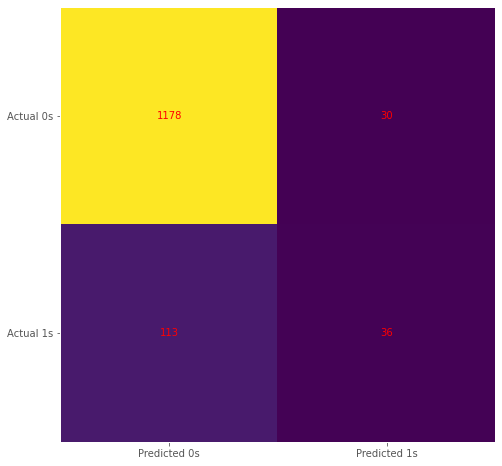

In [90]:
# Visualisasi confusion matrix
cm = confusion_matrix(y_test, pred_lr)

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
        
plt.show()

Dari plot tersebut kita peroleh:

1178 prediksi negatif yang benar
113 prediksi negatif yang salah
30 prediksi positif yang salah
36 prediksi positif yang benar

Decision Tree

In [91]:
#Import packages
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# Membuat DecisionTree Classifier
dt = tree.DecisionTreeClassifier()

#Training model
dt.fit(X_train,y_train)

#Predict the response for test dataset
pred_dt = dt.predict(X_test)

# Melihat akurasi model
print('Accuracy Score: ', metrics.accuracy_score(y_test,pred_dt))
matrix_dt = confusion_matrix(y_test,pred_dt)
print(matrix_dt)

Accuracy Score:  0.8592483419307295
[[1104  104]
 [  87   62]]


Random Forest

In [92]:
#Import packages
from sklearn.ensemble import RandomForestClassifier

#Membuat random forest classifier
rf = RandomForestClassifier()

#Training data
rf.fit(X_train,y_train) 

#Predict the response for test dataset
pred_rf=rf.predict(X_test)

# Melihat akurasi model
print('Accuracy Score: ', metrics.accuracy_score(y_test,pred_rf))
matrix_rf = confusion_matrix(y_test,pred_rf)
print(matrix_rf)
print(classification_report(y_test,pred_rf))

Accuracy Score:  0.9019896831245394
[[1179   29]
 [ 104   45]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1208
           1       0.61      0.30      0.40       149

    accuracy                           0.90      1357
   macro avg       0.76      0.64      0.68      1357
weighted avg       0.88      0.90      0.89      1357



Support Vector Machine

In [93]:
#import package
from sklearn import svm

#Membuat svm classfifier
sv = svm.SVC()

#training data
sv.fit(X_train,y_train)

#Predict the response for test dataset
pred_sv = sv.predict(X_test)

#melihat akurasi model
print('Accuracy Score: ', metrics.accuracy_score(y_test,pred_sv))
matrix_sv = confusion_matrix(y_test,pred_sv)
print(matrix_sv)
print(classification_report(y_test,pred_sv))

Accuracy Score:  0.899042004421518
[[1196   12]
 [ 125   24]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1208
           1       0.67      0.16      0.26       149

    accuracy                           0.90      1357
   macro avg       0.79      0.58      0.60      1357
weighted avg       0.88      0.90      0.87      1357



Naive Bayes

In [94]:
#import package
from sklearn.naive_bayes import GaussianNB 

#Membuat svm classfifier
nb = GaussianNB()

#training data
nb.fit(X_train,y_train)

#Predict the response for test dataset
pred_nb = nb.predict(X_test) 

#melihat akurasi model
print('Accuracy Score: ', metrics.accuracy_score(y_test,pred_nb))
matrix_nb = confusion_matrix(y_test,pred_nb)
print(matrix_nb) 
print(classification_report(y_test,pred_nb))

Accuracy Score:  0.8518791451731761
[[1096  112]
 [  89   60]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1208
           1       0.35      0.40      0.37       149

    accuracy                           0.85      1357
   macro avg       0.64      0.65      0.64      1357
weighted avg       0.86      0.85      0.86      1357



K-Nearest Neighbors

In [95]:
#import packages
from sklearn.neighbors import KNeighborsClassifier

#membuat KNeighbors Classifier
kn = KNeighborsClassifier() 

# training data
kn.fit(X_train,y_train)

#predict respons for test dataset
pred_kn = kn.predict(X_test)

#Melihat Akurasi model
print('Accuracy Score: ', metrics.accuracy_score(y_test,pred_kn))
matrix_kn = confusion_matrix(y_test,pred_kn)
print(matrix_kn)
print(classification_report(y_test,pred_kn))

Accuracy Score:  0.8968312453942521
[[1185   23]
 [ 117   32]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1208
           1       0.58      0.21      0.31       149

    accuracy                           0.90      1357
   macro avg       0.75      0.60      0.63      1357
weighted avg       0.87      0.90      0.87      1357



In [96]:
# improve model dan mencari tahu nilai k yang optimal

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train, y_train) 
    pred_i = kn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

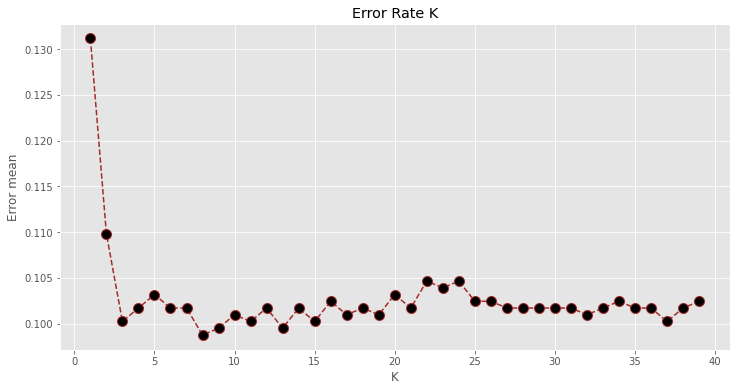

In [97]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='brown', linestyle='dashed', marker='o',  
         markerfacecolor='black', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

Dari plot tersebut terlihat bahwa error terkecil yang kita dapatkan ada pada K = 8.

In [98]:
# Cek akurasi model untuk nilai k = 8

#membuat KNeighbors Classifier
kn8 = KNeighborsClassifier(n_neighbors=8) 

# training data
kn8.fit(X_train,y_train)

#predict respons for test dataset
pred_kn8 = kn8.predict(X_test)

#Melihat Akurasi model
print('Accuracy Score: ', metrics.accuracy_score(y_test,pred_kn8))
matrix_kn8 = confusion_matrix(y_test,pred_kn8)
print(matrix_kn8)
print(classification_report(y_test,pred_kn8))

Accuracy Score:  0.9012527634487841
[[1198   10]
 [ 124   25]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1208
           1       0.71      0.17      0.27       149

    accuracy                           0.90      1357
   macro avg       0.81      0.58      0.61      1357
weighted avg       0.89      0.90      0.87      1357



Algorithm Analysis

In [99]:
# Melihat akurasi masing-masing Model

ac_lr = accuracy_score(y_test, pred_lr)
ac_dt = accuracy_score(y_test, pred_dt)
ac_rf = accuracy_score(y_test, pred_rf)
ac_sv = accuracy_score(y_test, pred_sv)
ac_nb = accuracy_score(y_test, pred_nb)
ac_kn8 = accuracy_score(y_test, pred_kn8)


print('Accuracy Score:')
print('     ')
print("Logistic Regression:", ac_lr) 
print("Decision Tree:", ac_dt)
print("Random Forest:", ac_rf) 
print("SVM:", ac_sv)
print("Naive Bayes:", ac_nb) 
print("KNN:", ac_kn8) 

Accuracy Score:
     
Logistic Regression: 0.894620486366986
Decision Tree: 0.8592483419307295
Random Forest: 0.9019896831245394
SVM: 0.899042004421518
Naive Bayes: 0.8518791451731761
KNN: 0.9012527634487841


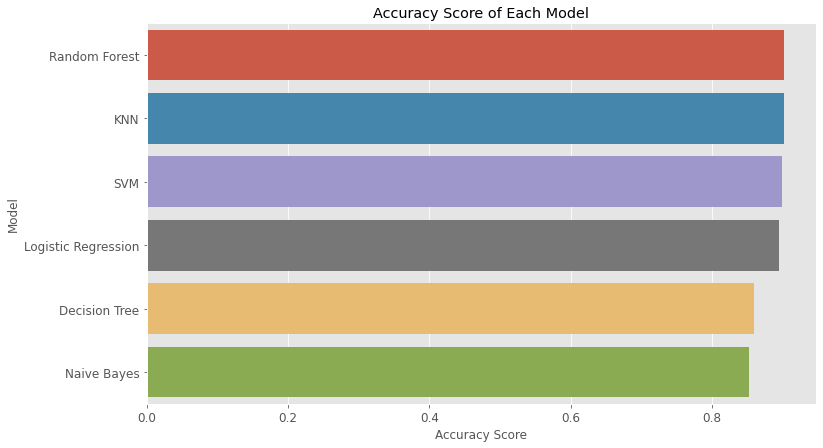

In [100]:
# Membuat Bar Plot dari nilai akurasi masing-masing model

import seaborn as sns
from matplotlib import style
style.use('ggplot')

warna = ('greenyellow', 'orange', 'lightcoral', 'lightskyblue', 'aqua', 'brown')
model = ['Logistic Regression','Decision Tree','Random Forest','SVM','Naive Bayes','KNN']
accuracy_score = [ac_lr, ac_dt, ac_rf, ac_sv, ac_nb, ac_kn8]
df_bank_acc = pd.DataFrame({'Model':model,
                       'Accuracy Score':accuracy_score
                      }) 
df_bank_acc = df_bank_acc.sort_values(['Accuracy Score'], ascending=False) 

plt.figure(figsize=(12,7)) 
sns.barplot(x='Accuracy Score',
           y='Model',
           data = df_bank_acc,
           estimator=sum,
           ci=None) 


plt.xlabel('Accuracy Score') # add to x-label to the plot
plt.ylabel('Model') # add y-label to the plot
plt.title('Accuracy Score of Each Model') # add title to the plot
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

Pemodelan dengan Nilai Akurasi Terbaik

Berdasarkan analisis beberapa pemodelan yang telah dilakukan, maka dapat disimpulkan bahwa pemodelan yang menghasilkan nilai akurasi atau prediksi yang paling bagus yaitu pemodelan dengan menggunakan metode Random Forest. Nilai akurasi yang didapatkan yaitu 90.2% (0.9019896831245394).

Pemodelan dengan Nilai Akurasi Terendah

Untuk hasil pemodelan dengan hasil nilai akurasi atau prediksi paling rendah yaitu pemodelan dengan menggunakan Naive Bayes. Nilai yang didapatkan yaitu 85.19% (0.8518791451731761). 

Kesimpulan

Jadi, untuk dataset bank.csv related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Untuk memprediksi apakah client akan subscribe (yes/no) sebuah term deposit (variable y), maka pemodelan yang cocok dilakukan adalah dengan menggunakan pemodelan Random Forest.

In [102]:
# Menyimpan model di pickle
import pickle
pickle.dump(kn8, open('./model_classifier.pkl','wb'))